尝试调用 scuc.solve_scuc() 获取启停计划 u...
构建模型...
[[ 21.92982456 -16.66666667  -5.26315789   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [-16.66666667  33.10457516   0.          -5.88235294  -5.
   -5.55555556   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -5.26315789   0.          30.26315789 -25.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.         

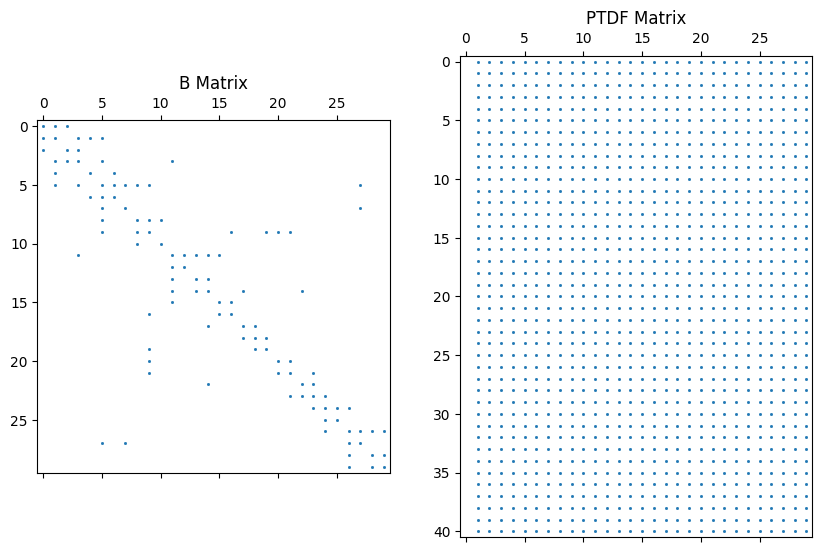

求解模型...

=== SCUC 求解结果 ===
Gen 1: Pg = 0.575 p.u. | u = 1
Gen 2: Pg = 0.800 p.u. | u = 1
Gen 3: Pg = 0.500 p.u. | u = 1
Gen 4: Pg = 0.000 p.u. | u = 0
Gen 5: Pg = 0.017 p.u. | u = 1
Gen 6: Pg = 0.000 p.u. | u = 0

总成本: 3.138
成功获取 u（来自 scuc）
求解状态: ok, 终止条件: optimal

--- SCED 结果（p.u. 单位） ---
Gen 1 @ bus  1: Pg =   0.5750 p.u. (u=1)
Gen 2 @ bus  2: Pg =   0.8000 p.u. (u=1)
Gen 3 @ bus 22: Pg =   0.5000 p.u. (u=1)
Gen 4 @ bus 27: Pg =   0.0000 p.u. (u=0)
Gen 5 @ bus 23: Pg =   0.0170 p.u. (u=1)
Gen 6 @ bus 13: Pg =   0.0000 p.u. (u=0)

--- 节点边际电价 LMPs（来自 nodal balance 的对偶） ---
Bus  1: LMP = 2.0230
Bus  2: LMP = 2.0213
Bus  3: LMP = 2.0284
Bus  4: LMP = 2.0296
Bus  5: LMP = 2.0165
Bus  6: LMP = 2.0117
Bus  7: LMP = 2.0136
Bus  8: LMP = 2.0268
Bus  9: LMP = 1.6905
Bus 10: LMP = 1.5223
Bus 11: LMP = 1.6905
Bus 12: LMP = 2.1656
Bus 13: LMP = 2.1656
Bus 14: LMP = 2.2740
Bus 15: LMP = 2.3573
Bus 16: LMP = 1.8918
Bus 17: LMP = 1.6318
Bus 18: LMP = 2.0657
Bus 19: LMP = 1.8934
Bus 20: LMP = 1.8006


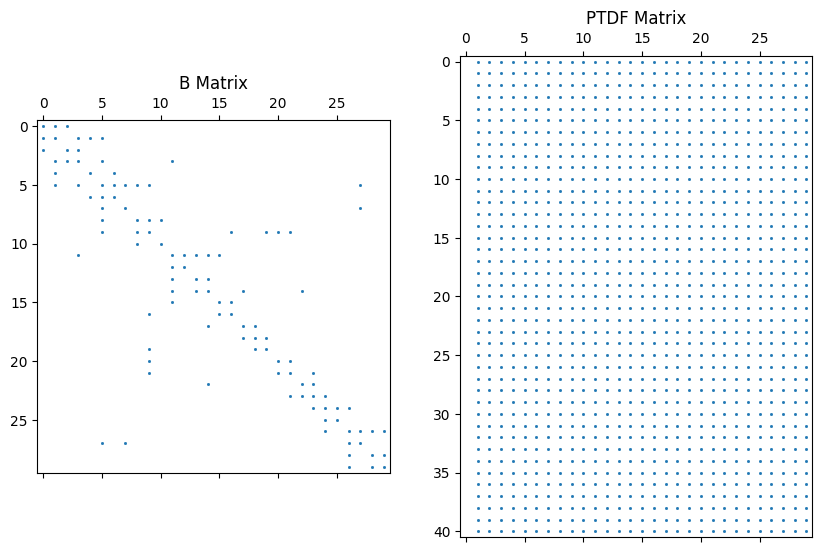

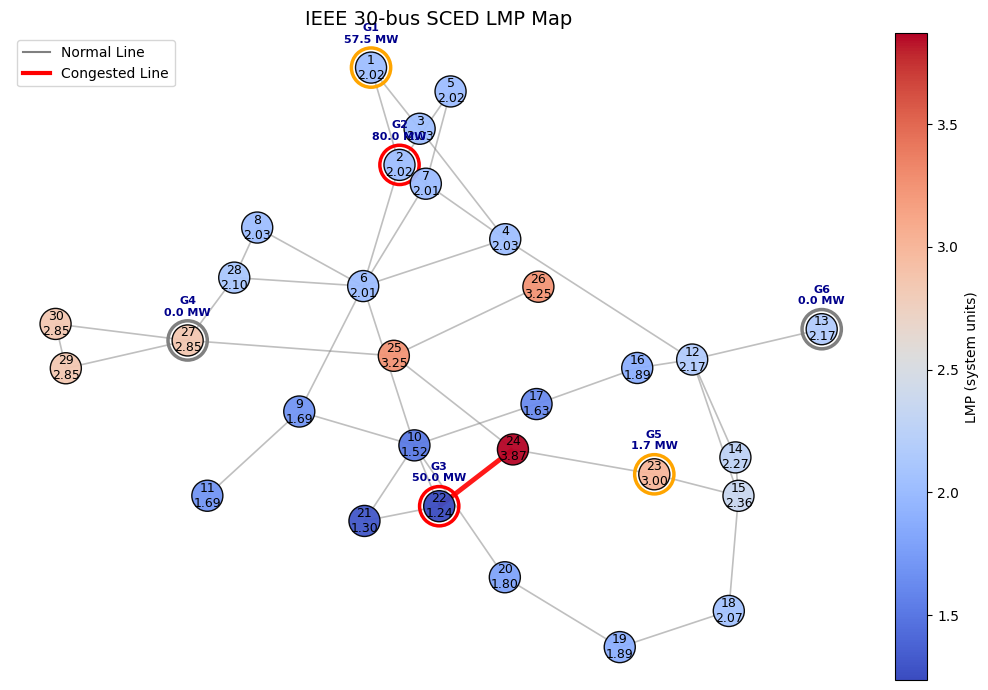

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pypower.api import case14
from pypower.api import case30
from pypower.api import case39
from pypower.api import case57
from pypower.api import case118
import sced
import utils

# mpc = case14()  

# mpc = case39()

mpc = case30()
mpc['gencost'][:, 1] = 0.001

# mpc = case118()


nb = mpc['bus'].shape[0]
ng = mpc['gen'].shape[0]

Pg_vals, LMPs = sced.solve_sced(mpc)

utils.visualize_sced(mpc, Pg_vals, LMPs)